<a href="https://colab.research.google.com/github/Kashish-x1/100-days-of-ML/blob/main/day%2047%20PCA/day_47_pca_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(23)

# Generate samples for class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

# Create DataFrame for class 1
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Generate samples for class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# Create DataFrame for class 2
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Use pd.concat instead of append
df = pd.concat([df, df1], ignore_index=True)

# Sample 40 rows from the combined DataFrame
df = df.sample(40)

# Display the DataFrame
print(df)

    feature1  feature2  feature3  target
2  -0.367548 -1.137460 -1.322148       1
34  0.177061 -0.598109  1.226512       0
14  0.420623  0.411620 -0.071324       1
11  1.968435 -0.547788 -0.679418       1
12 -2.506230  0.146960  0.606195       1
29  1.425140  1.441152  0.182561       0
31  2.224431  0.230401  1.192120       0
4   0.322272  0.060343 -1.043450       1
32 -0.723253  1.461259 -0.085367       0
33  2.823378 -0.332863  2.637391       0
36 -1.389866  0.666726  1.343517       0
18 -0.331617 -1.632386  0.619114       1
0   0.666988  0.025813 -0.777619       1
5  -1.009942  0.441736  1.128877       1
39  0.384865  1.323546 -0.103193       0
22  1.676860  4.187503 -0.080565       0
8   0.241106 -0.952510 -0.136267       1
15 -0.045438  1.040886 -0.094035       1
19 -0.992574 -0.161346  1.192404       1
30  1.437892  1.099723  1.065406       0
25  0.290746  0.866975  0.982643       0
21  0.731858  0.517441  2.244610       0
37 -1.027861  1.131416  2.603234       0
16 -0.420844 -0.

In [ ]:

df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [ ]:

import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [ ]:

# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [ ]:

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:

eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [ ]:

eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

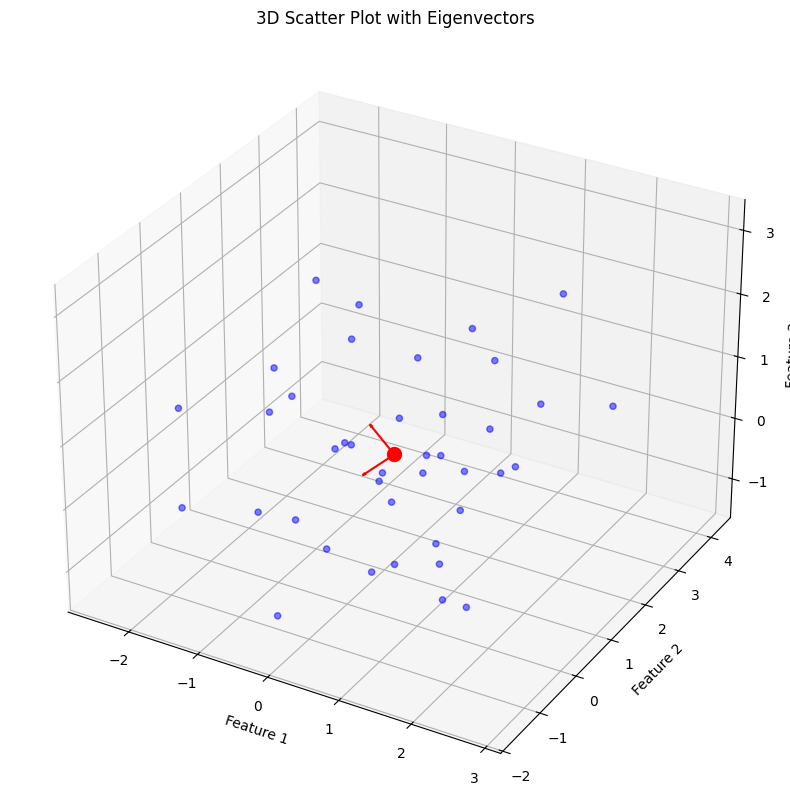

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Combine the two classes
df = pd.concat([df, df1], ignore_index=True)

# Calculate the mean and covariance matrix
mean = df[['feature1', 'feature2', 'feature3']].mean().values
cov_matrix = np.cov(df[['feature1', 'feature2', 'feature3']].T)

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], color='blue', alpha=0.5)

# Plot the mean point
ax.scatter(mean[0], mean[1], mean[2], color='red', s=100)

# Plot the eigenvectors using quiver
for i in range(len(eigen_vectors)):
    ax.quiver(mean[0], mean[1], mean[2],
              eigen_vectors[0, i], eigen_vectors[1, i], eigen_vectors[2, i],
              length=0.5, color='r', arrow_length_ratio=0.1)

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot with Eigenvectors')
plt.show()

In [ ]:
pc = eigen_vectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [ ]:

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.724373,0.294692,1
1,-1.469510,0.377697,1
2,0.502355,1.303153,1
3,-0.582337,-1.523289,1
4,-0.640420,0.704788,1


In [ ]:

new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()